# Visualisasi Data

## Exploring Immigration DataSet

DataSet yang digunakan adalah data immigran menuju canada dari 1980 - 2013

Kita dapat menggunakan panda untuk melihat data tersebut.

In [1]:
import pandas as pd
import numpy as np

df_can = pd.read_excel('Canada.xlsx', 
                       sheet_name = 'Canada by Citizenship',
                      skiprows=range(20),
                      skip_footer=2)

df_can.head()

/home/abc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  import sys


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Selanjutnya melakukan beberapa preposesing pada dataset, seperti : 

In [2]:

# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True) #Menghapus kolom yang tidak diperlukan

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
#Mengubah beberapa nama kolom


df_can.set_index('Country', inplace=True) #Membuat index dari kolom Country

df_can['Total'] = df_can.sum(axis=1) #Membuat kolom baru dengan nama total dan nilai dari penjumlahan semua baris

In [3]:
df_can.columns = list(map(str, df_can.columns))

In [4]:
years = list(map(str, range(1980, 2014)))

In [5]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [6]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


## 1. Visualisasi Data menggunakan Matplotlib

Matplotlib merupakan sebuah library dari python untuk menvisualisasi data ke dalam plot. Setiap fungsi plot memiliki beberapa perubahan pada gambar, seperti : line plot, area plot, pie plot , box plot dll

In [7]:

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style


['seaborn-talk', 'bmh', 'seaborn-darkgrid', '_classic_test', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-notebook', 'grayscale', 'fivethirtyeight', 'seaborn', 'seaborn-whitegrid', 'classic', 'fast', 'seaborn-colorblind', 'seaborn-ticks', 'dark_background', 'seaborn-muted', 'seaborn-deep', 'Solarize_Light2', 'seaborn-paper', 'seaborn-pastel', 'tableau-colorblind10', 'seaborn-poster', 'ggplot', 'seaborn-dark', 'seaborn-bright']


Pandas memiliki implementasi dari matplotlib yang dapat digunakan. Metode yang dipakai yaitu .plot()

## 1.1 Line Plot

Line plot adalah jenis plot yang dapat menampilkan informasi sebagai serangkaian titik data yang disebut 'markers' yang dihubungkan oleh segmen garis lurus. Line plot paling cocok untuk visualisasi berbasis tren data selama periode waktu tertentu.

Contoh line plot dengan studi kasus : Melihat data immigran haiti ke canada

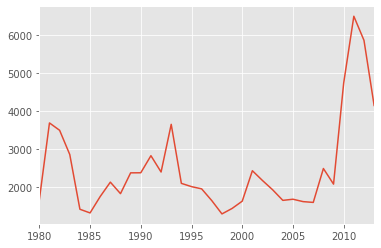

In [8]:
haiti = df_can.loc['Haiti', years ]
haiti.plot()

Pandas secara otomatis mengisi sumbu x (Vertical) dengan index (tahun), dan sumbu y(horizontal) dengan populasi 

Kita dapat melihat bagaimana jumlah immigran melonjak dari 2010 ketika canada meningkatkan upayanya untuk menerima pengungsi dari haiti.

Kita juga dapat memberikan label pada sumbu x dan y serta judul pada line plot dan juga dapat memberikan note pada lonjakan tersebut :

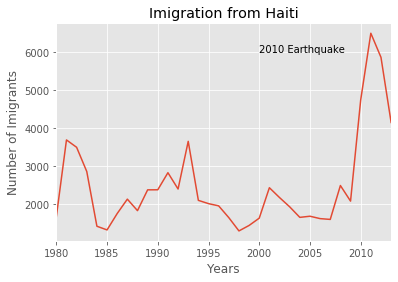

In [9]:
haiti.index = haiti.index.map(int)
haiti.plot(kind = 'line')

plt.title ('Imigration from Haiti')
plt.ylabel ('Number of Imigrants')
plt.xlabel ('Years')

plt.text(2000, 6000, '2010 Earthquake')

plt.show()

Sekarang, melihat visualisasi data perbandingan jumlah immigran india dan china dari tahun 1980 - 2013 :

In [10]:
china_india = df_can.loc[['India', 'China'], years]
china_india

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Karena ingin melihat sesuai tahun maka dataframe tsb dapat di transpose.

In [11]:
df_CI = china_india.transpose()
df_CI

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


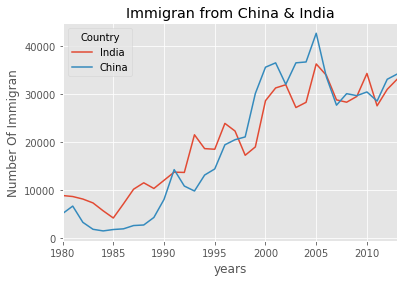

In [12]:
df_CI.plot(kind='line')

plt.title('Immigran from China & India')
plt.ylabel('Number Of Immigran')
plt.xlabel('years')

plt.show()

 Dari plot di atas kita dapat mengamati bahwa jumlah immigran india & China memiliki tren yang mirip selama bertahun-tahun

Kita juga dapat membadingkan tren 5 negara teratas yang berkontribusi paling besar imigrasi ke canada.

In [13]:
 df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
df_can.sort_values(by='Total', ascending = False, inplace = True, axis = 0)

In [15]:
df_top5 = df_can.head(5)

In [16]:
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [17]:
df_top5 = df_top5[years].transpose()

In [18]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


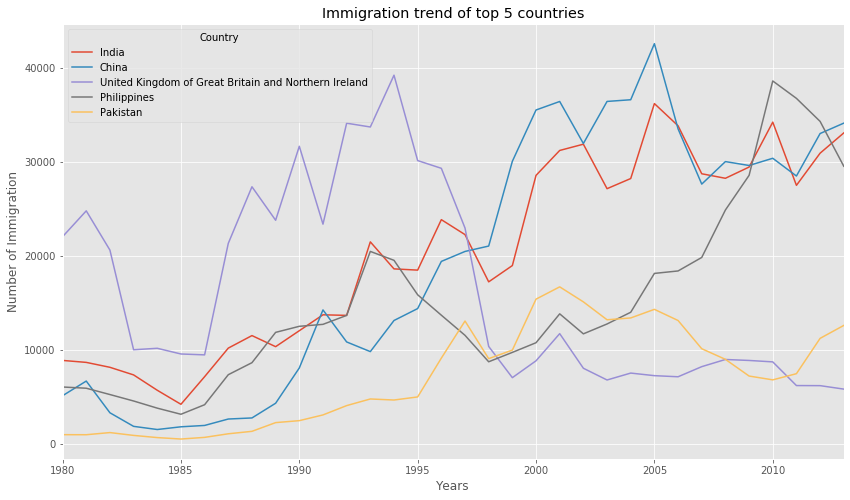

In [19]:
df_top5.plot(kind='line', figsize = (14,8))

plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigration')

plt.show()

## 1.2 Area Plot

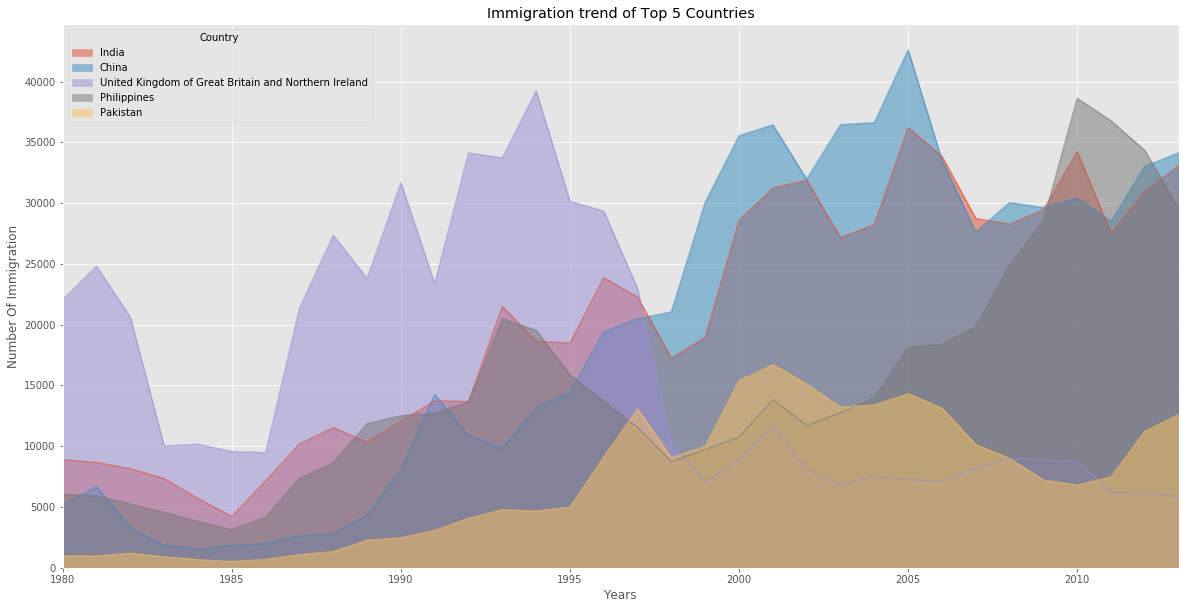

In [20]:
df_top5.plot(kind='area', figsize=(20,10), stacked = False)

plt.title('Immigration trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number Of Immigration')

plt.show()

 ## Terdapat 2 cara untuk melakukan plotting

### 1. Scripting Layer 

plt.title()

plt.ylabel()

plt.xlabel()

### 2. Artist Layer

Text(0.5, 0, 'Years')

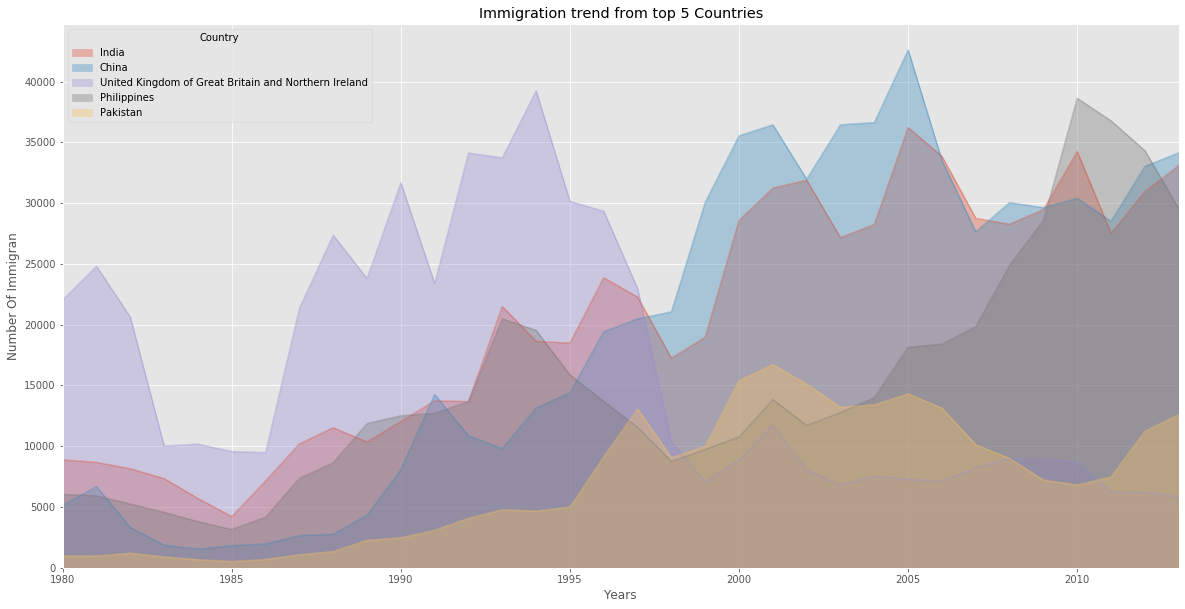

In [21]:
ax = df_top5.plot(kind='area', figsize=(20,10), stacked = False , alpha = 0.35)

ax.set_title('Immigration trend from top 5 Countries')
ax.set_ylabel('Number Of Immigran')
ax.set_xlabel('Years')



Membuat plot denga kondisi 5 negara yang berkontribusi paling sedikit :

In [22]:
df_least5 = df_can.tail(5)

df_least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
df_least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


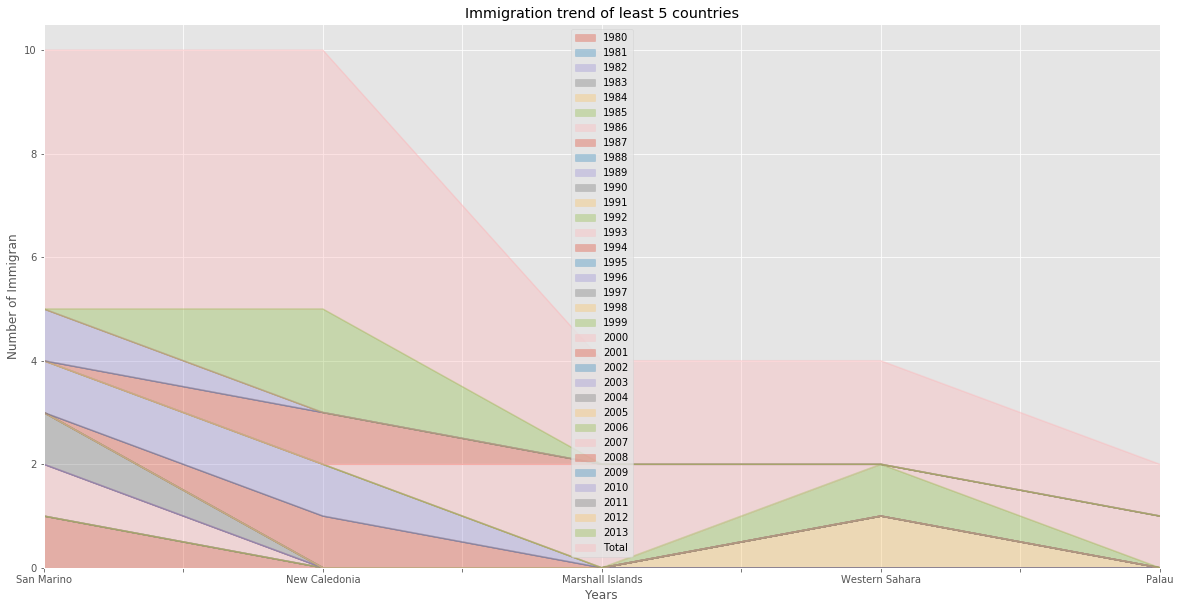

In [24]:
df_least5.plot(kind = 'area',
              alpha=0.35,
              figsize=(20,10))

plt.title('Immigration trend of least 5 countries')
plt.ylabel('Number of Immigran')
plt.xlabel('Years')

plt.show()

## 1.3 Histograms

Histogram adalah cara menggambarkan distribusi frekuensi dataset numerik.

Studi Kasus : Bagaimana distribusi frekuensi jumlah immigran baru dari berbagai negara ke Kanada pada tahun 2013?

Untuk mengetahui jawaban dari studi kasus di atas, kita memerlukan histogram numpy untuk mendapatkan rentang bin dan jumlah frekuensi sebagai berikut :

In [25]:
count , bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Untuk membuat histogram plot kita dapat menggunakan metode .plot(kind='hist')

Text(0, 0.5, 'Number Of Immigrans')

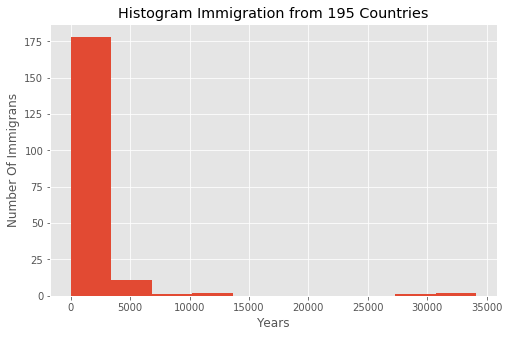

In [26]:
df_can['2013'].plot(kind = 'hist',
                   figsize = (8,5))

plt.title('Histogram Immigration from 195 Countries')
plt.xlabel('Years')
plt.ylabel('Number Of Immigrans')

Dalam plot di atas , sumbu x mewakili kisaran populasi imigran dalam interval 3412,9 sumbu y mewakili jumlah negara yang berkontribusi terhadap populasi tersebut.

Memperbaiki plot karena label sumbu x tidak sesuai dengan nilai bin :

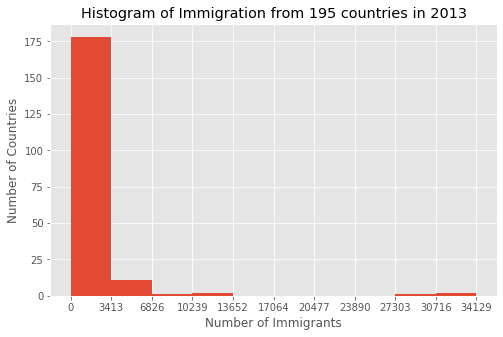

In [27]:

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()


 kita juga dapat membuat banyak histogram di dalam plot yang sama. Sebagai contoh :
        
        Apa distribusi Denmark, Norwegia, dan swedia untuk tahun 1980-2013.

In [28]:
df_DNS = df_can.loc[['Denmark' , 'Norway', 'Sweden'], years]
df_DNS

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


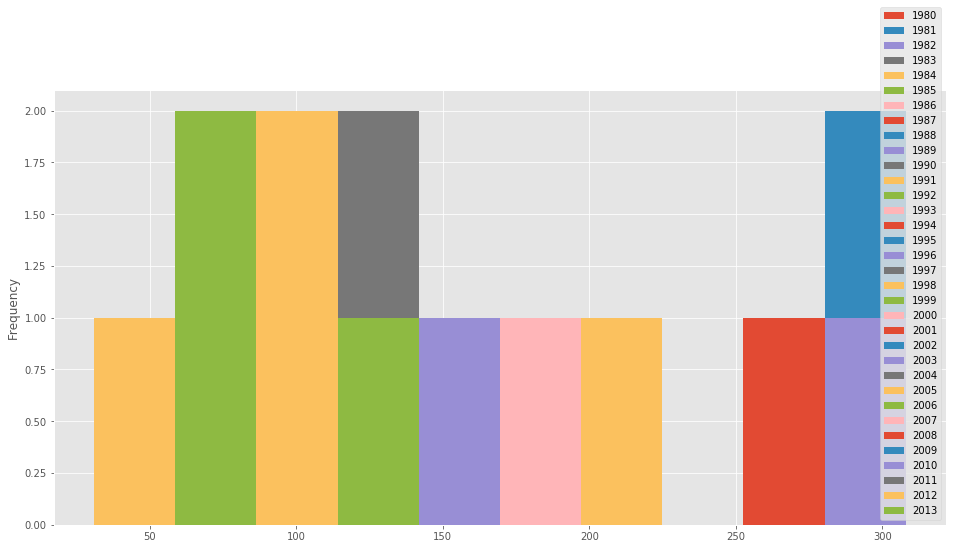

In [29]:
 df_DNS.plot(kind = 'hist', figsize=(16,8))

 Karena indexnya blm sesuai, kita transpose data terlebih dahulu :

In [30]:
df_DNS = df_DNS[years].transpose()
df_DNS

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


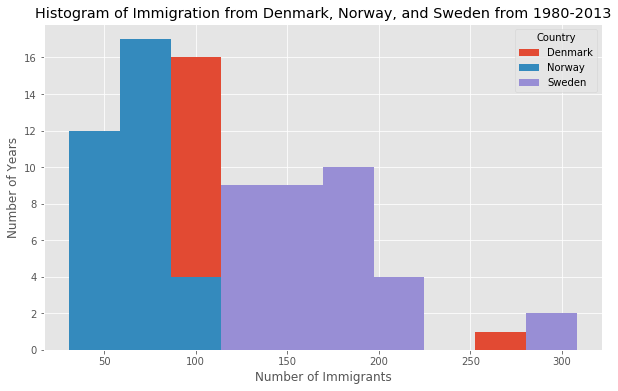

In [31]:
df_DNS.plot(kind='hist', figsize=(10,6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Memodifikasi plot agar lebih enak dilihat :

- Meningkatkan ukuran bin 15 dengan mengirimkan parameter bin
- Mengatur transparansi 60% dengan mengirimkan parameter alpha
- Mengubah warna plot

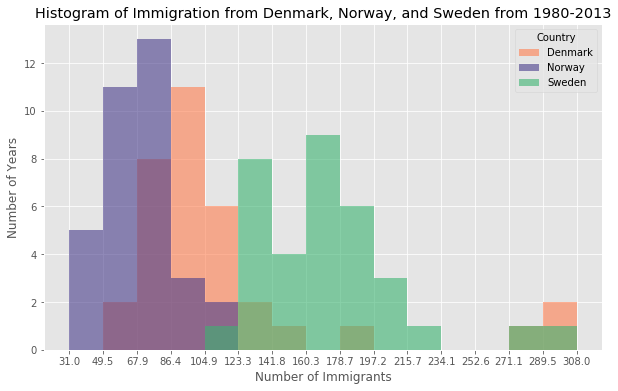

In [32]:
count, bin_edges = np.histogram(df_DNS, 15)


df_DNS.plot(kind='hist', 
            figsize=(10,6),
           bins = 15,
           alpha = 0.6,
           xticks = bin_edges,
           color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

 Jika kita menginginkan plot tidak bertumpuk , kita dapat menggunakan parameter stacked, 

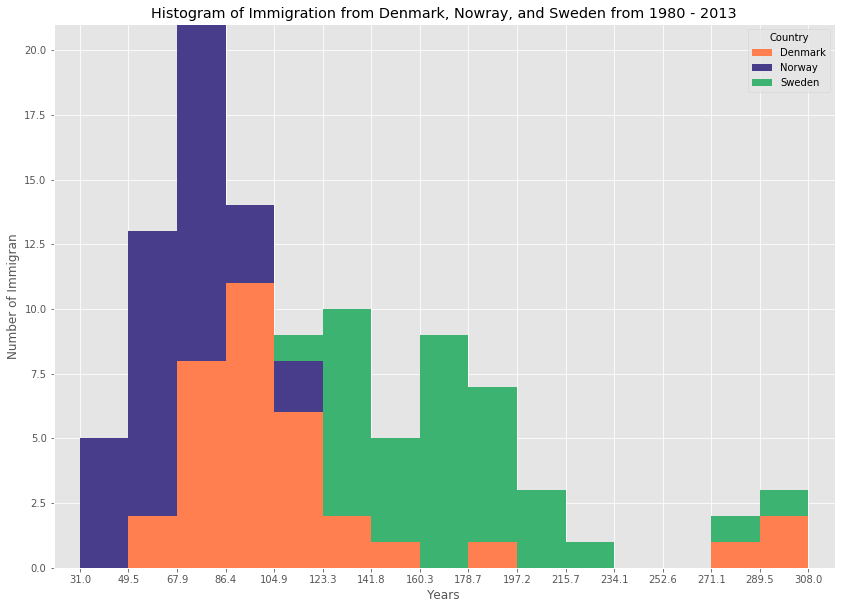

In [33]:
count, bin_edges = np.histogram(df_DNS, 15)

xmin = bin_edges[0] - 10 #Untuk menyesuaikan label sumbu x min dan max
xmax = bin_edges[-1] + 10 

df_DNS.plot(kind ='hist',
         figsize = (14,10),
         bins=15,
         xticks = bin_edges,
         color = ['coral', 'darkslateblue', 'mediumseagreen'],
         stacked = True,
         xlim=(xmin,xmax))

plt.title('Histogram of Immigration from Denmark, Nowray, and Sweden from 1980 - 2013')
plt.ylabel('Number of Immigran')
plt.xlabel('Years')

plt.show()



# Bar Plot

bar plot adalah cara untuk mempresentasikan data dimana panjang bar mewakili besar/ukuran/sebuah variable. 

Untuk membuat plot bar, bisa dengan parameter :

- kind = 'bar'
- kind = 'barh' jika ingin membuat plot bar horizontal.

Plot bar sangat berguna untuk menganalisi data deret waktu. kekurangannya adalah tidak dapat membuat label di bagian bawah setiap bar.

Membandingkan jumlah imigran islandia dengan kanada dari tahun 1980 - 2013 :

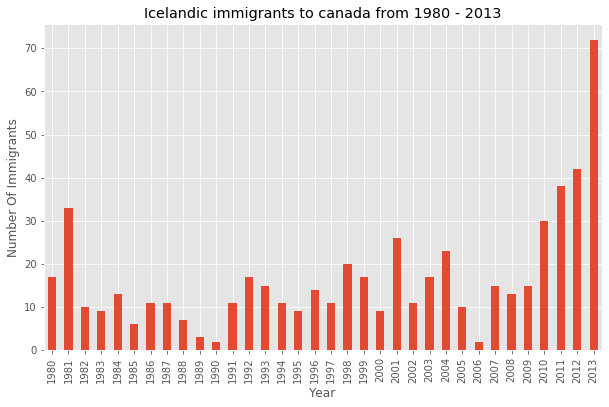

In [34]:
df_iceland = df_can.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Number Of Immigrants')
plt.title('Icelandic immigrants to canada from 1980 - 2013')

plt.show()

Plot bar di atas menujukkan total immigran setiap tahun. Kemudian kita dapat melihat denga jelas terdapat peningkatan secara pesat setelah tahun 2008 di karenakan terjadinya kirisis keuangan.

Kita dapat memberikan anotasi pada plot menggunakan method annotate.

- s: str, teks anotasi.

- xy: Tuple untuk menentukan titik (x,y) atau letak untuk memberi anotasi dan sebagai acuan titik awal pembuatan panah.

- xycoords: sebagai sistem coordinat yang diberikan xy di dalam 'data'.

- arrowprops: Sebagai parameter menggambar panah:

- arrowstyle = Menentukan bentuk panah seperti contoh : "->".

- connectionstyle: Menentukan tipe jenis koneksi sebagai contoh arc3 itu garis lurus

- color : Memberikan warna yang lebih spesifik

- lw : Menentukan lebar garis

- rotation : memberikan sudut rotasi pada teks

- va : perataan vertikal teks ['center' | 'top' | 'bottom' | 'baseline']

- ha: perataan horizontal ['Center'| 'top' , | 'right' , | 'left']

Penggunaan parameter - parameter di atas :

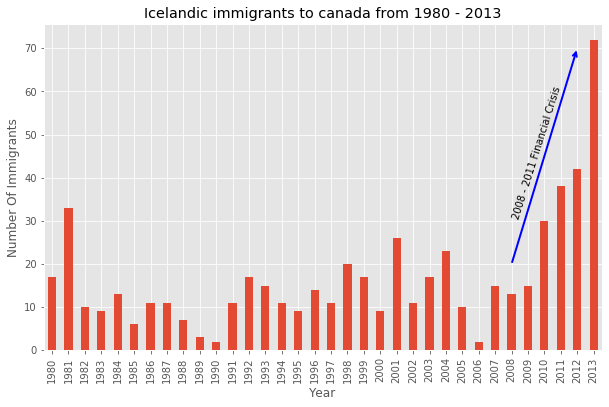

In [35]:
df_iceland.plot(kind='bar', figsize=(10,6) , rot = 90)

plt.xlabel('Year')
plt.ylabel('Number Of Immigrants')
plt.title('Icelandic immigrants to canada from 1980 - 2013')

plt.annotate('',  #--> String dikosongkan
            xy=(32,70),
            xytext=(28, 20),
            xycoords='data',
            arrowprops = dict(arrowstyle = '->', connectionstyle='arc3', color = 'blue', lw=2)
            )

plt.annotate('2008 - 2011 Financial Crisis', #--->Isi Text pada panah
            xy=(28,30),
            rotation=72.5,
            va='bottom',
            ha='left')

plt.show()

Terkadang lebih praktis untuk mempresentasikan data secara horizontal, terutama jika kita membutuhkan lebih banyak ruang untuk member label pada bar.

Berikut contoh pengguna plot bar horizontal

Kita ingin menampilkan data negara apa saja yang berkontribusi paling tinggi pada proses imigrasi ke kanada :

In [36]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

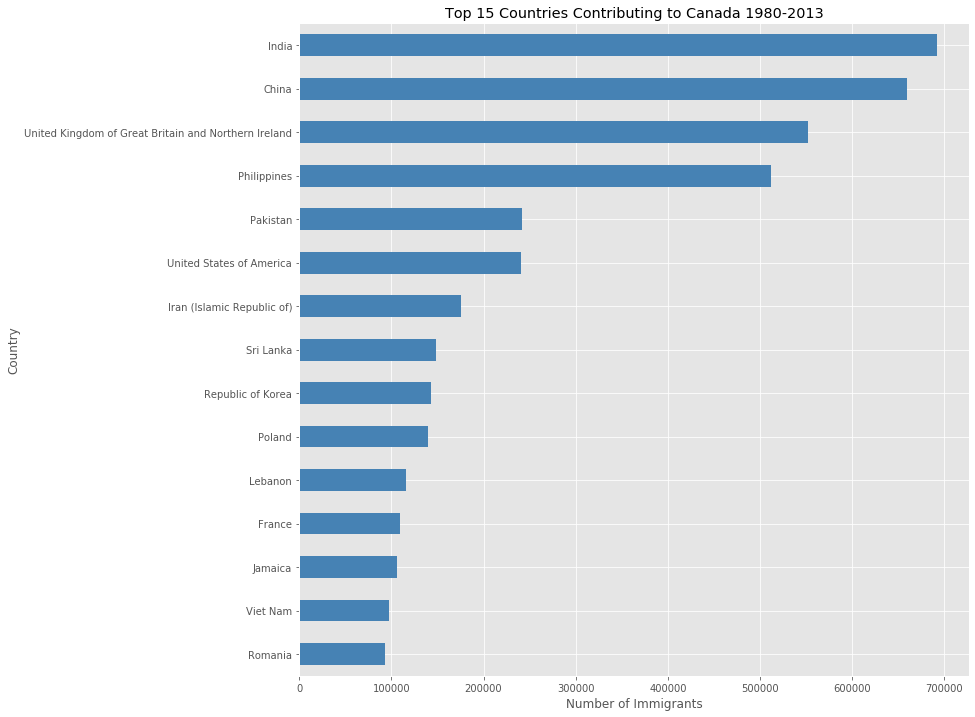

In [37]:
df_top15.plot(kind='barh',figsize=(12, 12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to Canada 1980-2013')

plt.show()


 # Pie Chart

Pie chart adalah grafik lingkaran yang menampilkan proporsi numerik dengan membagi lingkaran menjadi beberapa bagian.

Untuk membuat pie chart kita dapat menggunakan methode kind='pie'

Untuk contoh pie chart kita dapat menggunakan data imigran yang dikelompokkan berdasarkan benua untuk periode 1980-2013.

Kita akan menggunakan methode 'group by' pandas untuk meringkas data imigrasi sesuai benua.

prosesnya sebagai berikut :

- split : Membagi data menjadi beberapa kelompok
- apply : Menerapkan beberapa fungsi ke stiap group :
.sum()

.count()

.mean()

.std()

.aggregate()

.apply()

.etc..

- combine : menggabungkan hasilnya ke dalam sebuah struktur data.


In [38]:
df_continents = df_can.groupby('Continent', axis = 0).sum()

Langkah selanjutnya plot data di atas menggunakan method kind='pie' lalu ditambahkan beberapa parameter :

- autopct : adalah fungsi yang digunakan untuk memberi label pada irisan dengan nilai numeriknya, label akan ditempakan di dalam irisan. Jika label berformat string maka menjadi % (persen).

- startangle : Fungsi untuk memutar awal diagarm lingkaran dengan derajat sudut berlawanan arah jarum jam.

- shadow : Menggambar bayangan di bawah pie.

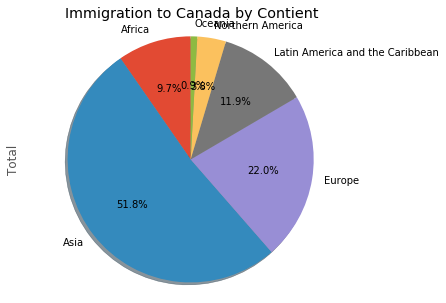

In [39]:
df_continents['Total'].plot(kind='pie',
                           figsize=(6,5),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True)

plt.title('Immigration to Canada by Contient')
plt.axis('Equal')

plt.show()

Plot di atas tidak terlihat begitu jelas untuk itu kita dapat memodifikasi agar dapat terlihat lebih jelas :

Langkah pertama :

- Mengahpus label teks pada lingkaran dan menambahkan legenda terpisah menggunakan, plt.legend()

- Mengeluarkan angka presentase menggunakan parameter pctdistance.

- custom warna benua menggunakan parameter color

- Memberikan perbedaan negara terendah dengan menggunakan parameter, explode.

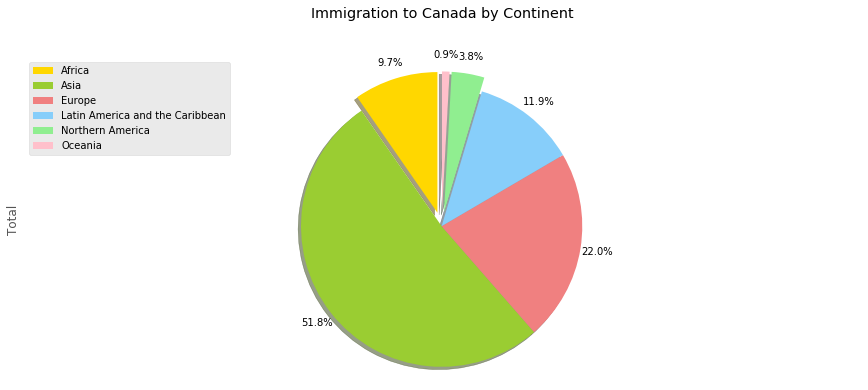

In [40]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgreen','pink']

explode_list =[0.1,0,0,0,0.1,0.1]

df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Immigration to Canada by Continent', y=1.10)
plt.axis('Equal')

plt.legend(labels=df_continents.index, loc='upper left')



plt.show()

# Box Plot

box plot adalah cara yang secara statistik merepresentasi distribusi data melalui 5 dimensi utam :

1. Minimum : Angka terkecil dalam dataset.

2. Quartil Pertama : Angkah tengah antara minimum dan median.

3. Quartil kedua : Nomor tengah dataset.

4. Quartil ketiga : Angkah tengah antara median dan maksimum.

5. Maksimum : Angka tertinggi dalam dataset.

Untuk membuat box plot, kita bsa menggunakan methode kind='box'.

Sebagai contoh, ingin menampilkan box plot untuk immigran jepang pada tahun 1980 - 2013 :

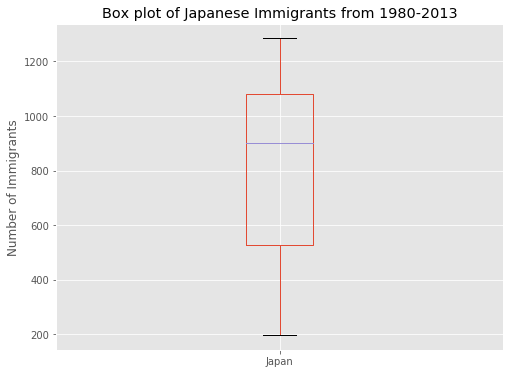

In [41]:
df_jap = df_can.loc[['Japan'], years].transpose()

df_jap.plot(kind='box', figsize =(8,6))

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [42]:
df_jap.describe() #Untuk melihat persentil secara lebih jelas

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Kita dapat melakukan pengamatan melalui plot di atas :

- Jumlah minimum imigran adalah sekitar 200(min)

- Jumlah maksimum imigran adalah sekitar 1300(max)

- Jumlah rata-rata imigran adalah sekitar 900(median)

- 25% dari tahun ke tahun memiliki jumlah imigran sekitar 500 (Quartil pertama)

- 75% dari tahun ke tahun memiliki jumlah imigran sekitar 1100(Quartil kedua)

Membandingkan distribusi imigran dari indi dan cina untuk periode 1980 - 2013 :

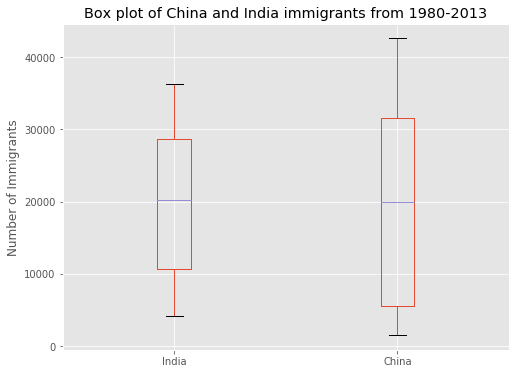

In [43]:
df_CI.plot(kind='box', figsize =(8,6))

plt.title('Box plot of China and India immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

Box plot juga dapat dibuat secara horizontal dengan menambahkan parameter vert = 'False', kita juga dapat merubah warna plot :

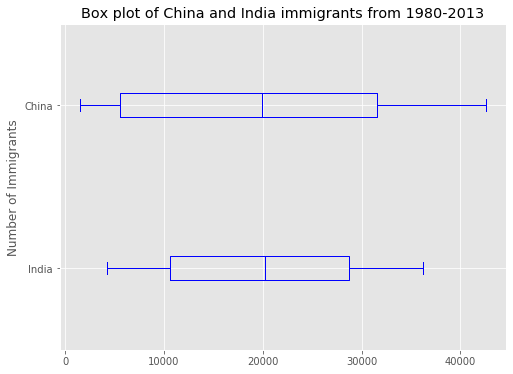

In [44]:
df_CI.plot(kind='box', figsize =(8,6), vert = False, color = 'blue')

plt.title('Box plot of China and India immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

## Sub Plots

Untuk membuat banyak plot menggunakan data yang sama dan ingin melakukan perbandingan visualisasi plot kita dapat menggunakan box plot.

Menentukan subplot dengan mengirimkan parameter ax ke dalam metode plot() :

In [45]:
# syntax :

fig = plt.figure() # Membuat figure
ax = fig.add_subplot(nrows, ncols, plot_number) # Membuat subplot

NameError: name 'nrows' is not defined

<Figure size 432x288 with 0 Axes>

nrows dan ncols diguanakan untuk membagi gambar menjadi subplot, plot_number untuk mengidentifikasi subplot tertentu yang dibuat oleh fungsi ini dalam kisi notional.

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind='box', color='blue', vert=False, figsize=(20,6), ax = ax0)

df_CI.plot(kind='line', figsize=(20,6), ax = ax1)

plt.show()

## Scatter Plot

Scatter plot adalah metode yang berguna untuk membadingkan variable satu sama lain. scatter plot terlihat mirip dengan line plot karena keduanya memetakan variabel independen dan dependen. Jika titik data dapa dihubungkan pada line plot, scatter plot tidak karena mereka tidak terhubug. data dalam scatter plot dianggak mengekspresikan tren. dengan analisis lebih lanjut menggunakan algoritma seperte regresi, kita dapat menghitung secara matematis hubungan ini dan menggunakanya untuk memprediksi tren di luar dataset.

Mari kita mulai dengan menvisualisasikan tren imigran total ke kanada untuk tahun 1980 - 2013.

- langkah pertama : Mendapatkan dataset untuk mendapatkan hubungan antara total populasi dan tahun, dan mengkonversi tahun ke tipe int.

In [ ]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0)) #Kita dapat menggunakan fungsi sum untuk mendapatkan total populasi per tahun

df_tot.index = map(int, df_tot.index) #Mengganti tipe data tahun menjadi int karena berguna untuk regresi

df_tot.reset_index(inplace = True) #me reset index untuk mengembalikan menjadi kolom pada df_tot

df_tot.columns = ['year','total']

- langkah 2 : Memplot data, kita bisa menggunakan scatter plot dengan metode kind='scatter' sebagai argumen plot. kita juga perlu memasukkan kunci x dan y untuk menentukan kolom yang terdapat pada sumbu x dan y

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color = 'darkblue')

plt.title('Total Immigration to Canada')
plt.xlabel('year')
plt.ylabel('Number Of Immigran')

plt.show()

 ## Bubble Plot

bubble plot adalah variasi dari scatter plot yang dapat menampilkan 3D data (x,y,z). Data points diganti dengan bubble, dengan ukuran bubble ditentukan oleh variable ketiga (z).

Di matplotlib kita bisa meneruskan array  skalar ke kata kunci s untuk plot(), yang berisi bobot setiap titik.


## Menganalisis efek dari depresi yang hebat dari negara Argentina

Argentina menderia depresi hebat sejak 1998-2002, yang menyebabkan pengangguran yang meluas, kerusuhan, jatuhnya pemerintah, dan gagal bayar utang. Dalam hal pendapatan, lebih dari 50% orang Argetina miskin dan tujuh dari sepuluh anak anak argentina miskin pada krisis di tahu 2002.

Mari kita menganalisis efek dari krisis ini, dan membadingkan imigrasi argentina dengan negara tetangga yaitu brazil. Dengan menggunakan bubble plot kita dapat melihat visulisasi imigrasi argentina dan brazil untuk tahu 1980-2013. Kita akan menetapkan bobot (z) untuk bubble tersebut sebagai nilai normal populasi untuk setiap tahun.

 - step 1 : Dapatkan data untuk brazil dan argentina, kemudian konversi tahun menjadi INT

In [ ]:
df_can_t =  df_can[years].transpose()

df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

 - Langkah 2 : Membuat bobot yang dinormalisasi

ada beberapa metode normalisasi dalam statistik, masing-masing dengan penggunaannya sendiri. dalam hal ini, kita akan menggunakan penskalaan fitur untuk membawa semua nilai ke dalam rentang [0,1]. Rumus umum adalah :

In [ ]:
%%html
<img src='https://public.boxcloud.com/d/1/b1!FDRrSl85rn4KUaTCc-JOCnAZ8okixS_p59rLDHPrAaYh3ECavlcq_CJTaUnvlhRlqNnNoK4cW-X3zVJ9osPaPKcHuDvyARrwd19pT0AM48sS9tM0Mz2G5OaieO9fHDVaijfw6oEUTERAnbrDQZx1sE1_PduPasLOul47bh0QUNwEUgKH4HEE0zTuHybGV5hNauWUVAN0-7z6aFb4Oo3NhWCNTicwno2Qg1hjYgmYbAJjmJ83OEVEObhO5Wsz6islF8DalFxbf-G4czF1xTl-99u8Ker1BSPnQa3-e8mtDYiK0edm_rCqKfPHs_Udrru6EiX65w-xTmXGgfjpAq1pkBJepI3XQFEnLp3AyLdXUEY12JiGiqEg_B6ENYZjRqguwFSca34PyXbOD1fY6BEmEGioWBNtVF1Hac9a6A3Esh6Rp76li8huMo8cIK24nOeSkyG_CgrwhqcML5H9pbenAyfT2BS-IxSH8Bn1YikL96h9s4MyBt1XOSCTrjsNT6EvTh164MhvkO_FR1YmhgDA6NEojq68-Z0Hq7heoMg2dEJ2_NZ4QKCDR1iMyi10QZlR3NtvrXf13gLmPye4r77_c1-fiwlk5v1gRQjrkrEGWF-fFAoiQZAnruuj2codVLgGccCT4q-IPo0mKMbVnIAhnEb4xHXyZYm6C568TNHhhLBNlm9_4TAww1IXdyNpd-b4aNtdkrwUHwWi7unPQ5rSTtIfjuU7H-XbxeDNMpf2lXRPKdgvaYaL_vI6oNHrGafdqSvOWj15X3DRmj0ydVDzolrAwIpBiKPwGg3gI1LRSyJ_X6o3J8KW9odV5fYU8QsB90Yj5tshN3rjiDtmp8dAwebckoiv8IEa6KrbxwFu8PyKH-XH8rQ_qLUCH6D0sA9h4MC3DgIFLOyn3Cnn4X6ntq0P8f2UYGZswo_sVZUfoojOTGwu8ST8QNCpXE2VLisL_izRFwp8X7JE4naPe_hcpp448gJUVqo5MBmQHvX7UKjWV8P91A9feGDRaquijO5vF75gUiX3dpueNOFSXtyZA4H-LEOh1quXHmvBidgg7m42hJDZYLKmSnlWLC4kcPTSTsIppXF03KS4d4lJCwoTMNA7NH6nqyRb6a-hdeTM-S8zWuKPaJyJvdZu74sV_FrP_8Lnz9gbbVFEwpZ0nLYSUkV0u5TbG7eCEvoZl-GAolpV_LiiciFyghvs_-W3EnXwO76seUYBW8TutlTzO_8BwJSMU1VD7viwdJ0wTOq3Y_kMnfKu1Mvok9BIQ0UgQ1sFiq_SkSJwWsa-aeMS9ENve-yyI5srHan6XTSok5QZj4O40jAWPfDQ8T72VXG2-wArsJYcN2-1m2mRSXZBZnML15j41ZSeDXK-Ul2Is3WivAnSKVzBiabxXWM4uc66XFz2WEcurwuCWlGi8kb5dHeUMk42zl96f6xr2fpLv41DXw../download', width=200 , height = 200, center>

dimana X adalah nilai asli, X' adalah nilai normal. RUmus menetapkan nilai maks dalam dataset ke 1, dan menentapkan nilai min ke 0. sisa titik data diskalakan ke nilai antara 0-1

In [ ]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

- Langkah 3 : Plot data.

untuk memplot 2 scatter plot di dalam satu plot, kita dapat memasukkan sumbu satu plot ke plot lainnya dengan meneruskannya melaluli parameter ax. kita juga akan meneruskan bobot menggunakan parameter s mengingat bahwa bobot yang di normalisasi adalah antara 0-1, mereka tidak akan terlihat di plot. Karena itu kita akan:

- Mengalikan bobot dengan 2000 untuk meningkatkannya pada grafik, dan tambahkan 10 untuk mengkompensasi nilai min ( Yang memliki bobot 0 dan oleh karena itu dikalikan 2000)

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
 
# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )
 
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# Word Clouds

cara kerja word cloud adalah dimana semakin banyak kata yang muncul maka semakin besar kata itu muncul dalam cloud.

dalam python kita dapat menggunakan fungsi word_cloud, berikut cara menggunakan word cloud :

In [47]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('WordCloud is installed and imported')

WordCloud is installed and imported


In [48]:
alice_novel = open('alice_novel.txt', 'r').read()

Sebagai contoh untuk menghasilkan kata cloud. Kita dapat membuat kata cloud dengan 2000 kata pertama dalam novel.

In [50]:
stopwords = set(STOPWORDS)

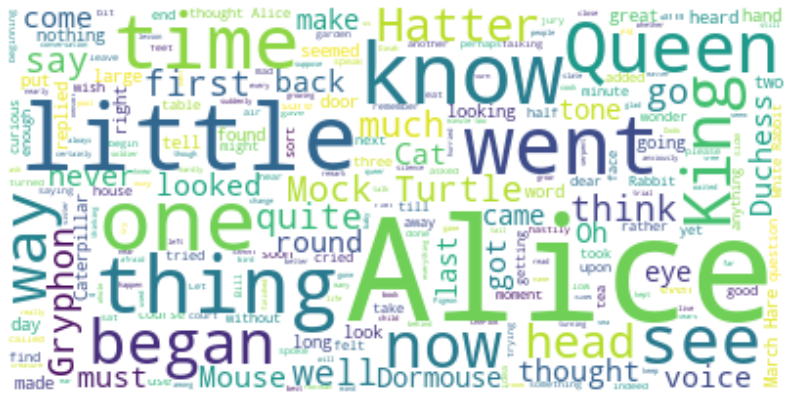

In [55]:

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Karena masih terdapat kata yang tidak informatif sepert 'said' kita dapat menambahkan stopword untuk kata 'said'

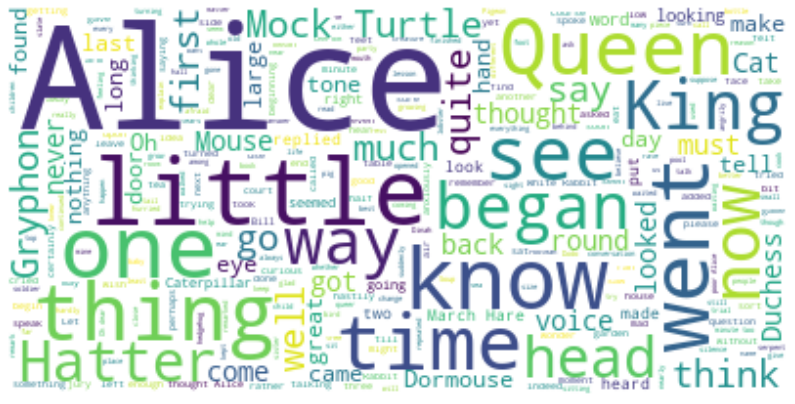

In [53]:

stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# Regression Plot

Mengeskplorasi seaborn untuk membuat sebuah regression plot dan melihat seberapa efisien membuat garis regresi dengan library seaborn :

In [58]:

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

df_tot.head()


,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


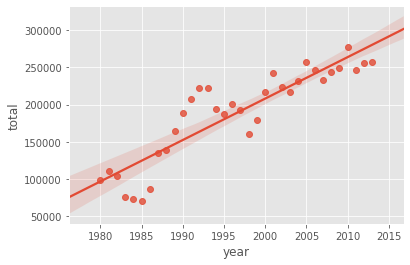

In [59]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

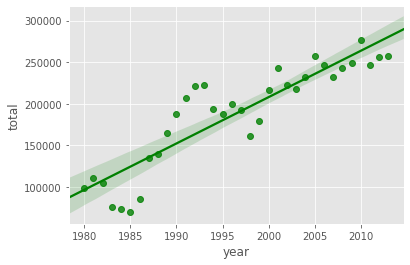

In [60]:
ax = sns.regplot(x='year', y='total', data=df_tot , color = 'green')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

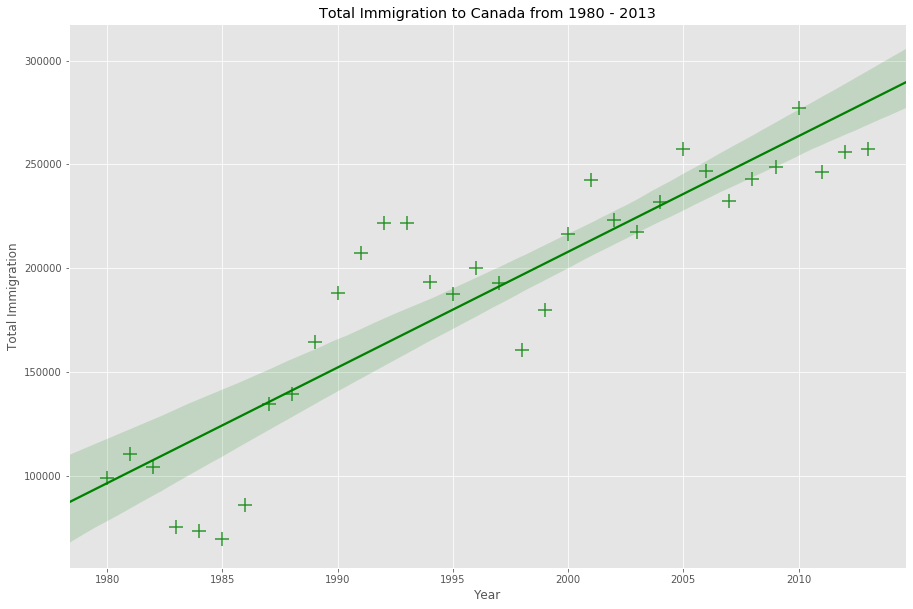

In [61]:
 
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title


# Generating Maps With Python

Pada bagian ini kita akan berbicara tentang cara membuat peta untuk berbagai tujuan. Untuk itu kita dapat menggunakan library folium untuk memvisualisasikan data geospatial.

## Folium

Folium merupakan library dari python untuk membuat beberapa jenis mapflet dan leaflet.

Untuk menggunakan folium kita dapat menggunakan syntax :

In [63]:
import folium

world_map = folium.Map()

world_map

Semua lokasi di peta ditentukan oleh masing-masing lintang (latitude) dan bujur (longitude).

Sebagai contoh mari kita buat peta yang berpusat di kanada dan bermain dengan tingkatan zoom untuk melihat bagaimana pengaruhnya terhadap peta yang diberikan.

In [65]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)
 
# display world map
world_map

In [67]:
  # define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=10)
 
# display world map
world_map

## Stamen Toner Maps

Toner maps untuk membuat peta menjadi hitam & Putih, toner maps sangat cocok untuk mengumpulkan data dan menjelajahi sungai dan zona costal.

In [68]:

# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map


  ## Terrain Maps

Terrain Maps berfungsi untuk melihat warna vegetasi dari peta tersebut. Terrain menampilkan pelabelan lanjutan dan generalisasi dari pekerjaan jalan - jalan tol.

In [69]:

# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map


## Maps With Markers

In [70]:
df_incidents = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [71]:
 df_incidents.shape

(150500, 13)

Untuk menyederhanakan data kita dapat menggunakan 100 data saja dengan fungsi limit

In [72]:
limit = 100

df_incidents = df_incidents.iloc[0:limit, :]

In [73]:
df_incidents.shape

(100, 13)

Selanjutnya kita dapat memvisualisasikan di mana kejahatan yang terjadi di kota san fransisco. Kita akan menggunakan default map dan menginisialisasi tingkatan zoom menjadi 12.

In [74]:

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map


Selanjutnya kita dapat menempatkan lokasi kejahatan di peta. 

Cara untuk melakukannya dalam folium adalah membuat FeatureGroup :

In [76]:

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)


Kita juga dapat menambahkan beberapa pop-up test yang akan ditampilkan ketika kita mengarahkan kursos ke arah marker.

Sebagai contoh kita akan membuat setiap penanda menampilkan kategori kejahatan :

In [78]:

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)


Cara lain yang dapat digunakan adalah mengelompokkan marker ke daam kelompok yang berbeda. 

setiap cluster dapat diwakili oleh jumlah kejahatan di setaip lingkungan, Cluster ini dapat dianggap sebagai wadah di fransisco untuk dianalisis secara terpisah:

In [79]:

from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map


Map di atas menggambarkan ketika kita memperkecil semua jalan, makan semua penanda akan dikelompokkan ke dalam satu kluster, kluster global dari 100 penanda atau kejahatan yang merupakan total kejahatan pada maps tersebut.

Setelah map diperbesar maka cluster global akan memecah jadi beberapa kelompok yang lebih kecil.

## Choropleth Map

Choropleth Map adalah peta tematik di mana area-area diarsir atau dipola secara proporsional dengan pengukuran variable statistik yang ditampilkan pada peta, seperti kepadatan populasi atau pendapatapn per kapita.

Choropleth menyediakan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis / menunjukkan tingkat variabilitas dalam suatu wilayah.

Di bawah ini adalah contoh penggambaran imigrasi dari berbagai negara ke kanada:

In [82]:
df_can.reset_index(inplace = True)

orld_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
 
# display map
world_map
 


Untuk membuat peta seperti di atas kita memerlukan file GeoJSON yang mendefinisikan area / batas negara, wilayah, dan negara yang kita minat.

Sesuai legenda peta choroplet, semakin gelap warna suatu negara dan semakin dekat warna menjadi merah maka semakin tinggi jumlah imigran dari negara itu. Dengan demikian, imigrasi tertinggi selama 33 tahun adalah dari cina, india, filipina, diikuti oleh polandia, pakistan, dan AS.



In [83]:
world_geo = r'world_countries.json'
 
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
 
# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map
 
